# Visualizing the Baseline Model

## Importing the necessary libraries

In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, make_scorer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

#imbalanced learning
from imblearn.ensemble import EasyEnsembleClassifier

# import custom functions
from custom_functions import get_data_summary, our_metrics, eval_metrics#, evaluate_model

# import custom scorers
#from custom_functions import get_f15, get_f2, get_f3



# import warnings
# warnings.filterwarnings('ignore')

## Loading the DataFrame

In [2]:
# loading the data
# this contains all the numerical (unscaled) and dummies from categorical
df = pd.read_csv('data/df_processed_dmy.csv')

In [3]:
#df.query('index_change_month < 0')

In [4]:
df.query('index_change_month < -30000')

,target,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,...,tarif_type_45,counter_statue_1.0,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_GAZ
22538,0,20,-99694.0,224,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62073,0,8,-46140.5,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
62122,0,2,-94930.0,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62140,0,1,-95194.0,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62151,0,6,-95800.0,110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400115,0,7,-98673.0,232,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4400126,0,7,-97172.0,232,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4400720,0,11,-46315.0,93,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4400725,0,14,-96879.0,93,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# loading the small data set to work on the plot without memory problems
# this contains all the numerical (unscaled) and dummies from categorical
X_train_tree_small = pd.read_csv('data/X_train_tree_small.csv', delimiter=',')#
y_train_tree_small = pd.read_csv('data/y_train_tree_small.csv', delimiter=',')#
X_train_tree_small.head()

,member_years,index_change_month,quantity_counters,client_catg_11,client_catg_12,client_catg_51,region_101,region_103,region_104,region_105,...,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_ELEC,counter_type_GAZ
0,20,176.25,41,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,11.00,8,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,99.75,54,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,656.50,16,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,34,294.50,41,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [6]:
quantile_idx = df[['index_change_month']].quantile(q=0.15)[0]
quantile_idx

5.75

In [7]:
df['pred_baseline'] = [1 if x <= quantile_idx else 0 for x in df['index_change_month']]

In [8]:
df.query('index_change_month < @quantile_idx').pred_baseline.describe()

count    670902.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: pred_baseline, dtype: float64

In [9]:
X_train_tree_small['pred_baseline'] = [1 if x <= quantile_idx else 0 for x in X_train_tree_small['index_change_month']]

In [10]:
features = X_train_tree_small.columns.to_list()

In [11]:
df_small = X_train_tree_small.copy()

In [12]:
features.remove('index_change_month')

In [13]:
features.remove('pred_baseline')

In [14]:
df_red = df[['index_change_month','pred_baseline']]
df_red.head()

,index_change_month,pred_baseline
0,20.500000,0
1,346.000000,0
2,30.750000,0
3,25.500000,0
4,47.666667,0


In [15]:
df_small.drop(features, axis=1, inplace=True)

In [16]:
df_small.head()

,index_change_month,pred_baseline
0,176.25,0
1,11.00,0
2,99.75,0
3,656.50,0
4,294.50,0


In [17]:
df_small.describe()

,index_change_month,pred_baseline
count,1.007255e+06,1.007255e+06
mean,1.542807e+02,1.509856e-01
std,2.736596e+03,3.580350e-01
min,-9.985390e+05,0.000000e+00
25%,1.975000e+01,0.000000e+00
50%,7.650000e+01,0.000000e+00
75%,1.575000e+02,0.000000e+00
max,9.867600e+04,1.000000e+00


In [18]:
# index_change_bins = [df_small.index_change_month.min() - 1, -20000, 0, 3, quantile_idx, 8, 10, 15, 30, 50, 100, 150, 200, df_small.index_change_month.max()]
# index_change_bins

In [19]:
# fixed_acidity_bins = np.arange(4, 17)
# fixed_acidity_series = pd.cut(red_wines_df['fixed acidity'], bins=fixed_acidity_bins,
#                               labels=fixed_acidity_bins[:-1])
# fixed_acidity_series.name = 'fa_bin'
# red_wines_df = pd.concat([red_wines_df, fixed_acidity_series], axis=1)

# alc_bins_red = np.array((df_redwine.alcohol.min(),alc_mean_red, df_redwine.alcohol.max()))#takes array of edges as input
# alc_ser_red = pd.cut(df_redwine.alcohol, bins=alc_bins_red, 
# #                              labels=alc_bins_red[:-1])
#                                 labels=["<= mean","> mean"])
# alc_ser_red.name = 'alc_red_bin'

# np.histogram(df_red["fixed acidity"],5)
# #returns values of histogram and bin edges
# # (array([274, 913, 298, 102,  12]),
# #  array([ 4.6 ,  6.86,  9.12, 11.38, 13.64, 15.9 ]))

# acidity_bins_white = np.histogram(df_white["fixed acidity"],5)[1]
# ac_ser_white = pd.cut(df_white["fixed acidity"], bins=acidity_bins_white, 
#                                  labels=[1,2,3,4,5])
# ac_ser_white.name = 'fx_acidity_white_bin'

# df_white =  pd.concat([df_white, ac_ser_white], axis=1)

In [20]:
# np.histogram(df_small["index_change_month"],100)
# # #returns values of histogram and bin edges

In [21]:
# # bins for negative index changes
# neg_bins = np.histogram(df_small.query('index_change_month <=0')["index_change_month"],4)[1]
# # bins for positive index changes
# pos_bins = np.histogram(df_small.query('index_change_month >=@quantile_idx')["index_change_month"],50)[1]

In [22]:
#[df_small.index_change_month.min() - 1, -20000, 0, quantile_idx]
#np.arange(100, 1600, 100)

In [23]:
#all_bins = np.concatenate([neg_bins, pos_bins])
all_bins = [df_small.index_change_month.min() - 1,-300, -200, -100, quantile_idx, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, df_small.index_change_month.max()]

In [24]:
all_bins_large = [df_red.index_change_month.min() - 1,-300, -200, -100, quantile_idx, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000,1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, df_red.index_change_month.max()]

In [25]:
#index_change_bins = np.histogram(df_small["index_change_month"],300)[1]
idx_ser = pd.cut(df_small["index_change_month"], bins=all_bins)#,labels=all_bins[:-1])
idx_ser.name = 'index_change_month_bin'

In [26]:
#index series for the large data set
idx_ser_large = pd.cut(df_red["index_change_month"], bins=all_bins_large)#,labels=all_bins[:-1])
idx_ser_large.name = 'index_change_month_bin'

In [27]:
df_small_bins =  pd.concat([df_small, idx_ser], axis=1)
df_small_bins.head()

,index_change_month,pred_baseline,index_change_month_bin
0,176.25,0,"(100.0, 200.0]"
1,11.00,0,"(5.75, 100.0]"
2,99.75,0,"(5.75, 100.0]"
3,656.50,0,"(600.0, 700.0]"
4,294.50,0,"(200.0, 300.0]"


In [28]:
df_red_bins =  pd.concat([df_red, idx_ser_large], axis=1)
df_red_bins.head()

,index_change_month,pred_baseline,index_change_month_bin
0,20.500000,0,"(5.75, 100.0]"
1,346.000000,0,"(300.0, 400.0]"
2,30.750000,0,"(5.75, 100.0]"
3,25.500000,0,"(5.75, 100.0]"
4,47.666667,0,"(5.75, 100.0]"


In [29]:
# index_change_bins = pd.DataFrame(pd.cut(df['index_change_month'], bins=10)).rename(columns={'index_change_month':'index_change_bin'})
# index_change_bins

In [30]:
# df_bins = pd.concat([df, index_change_bins], axis=1)
# df_bins

In [31]:
#df_small_bins.index_change_month_bin.value_counts()

In [32]:
# fig = plt.figure(figsize=(20,10))
# sns.histplot(data=df, x='index_change_month', hue='pred_baseline')
# plt.axvline(x=quantile_idx, color="b", dashes=(5, 2))

In [33]:
# use sample lines of df only
# use different plt, not histplot

In [34]:
# sns.histplot(data=df, x='index_change_month', hue='pred_baseline')
#plt.axvline(x=quantile_idx, color="b", dashes=(5, 2))
# sns.lineplot(x=quantile_idx, y=[0,5])

In [36]:
# df_small_bins_lower = df_small_bins.query('index_change_month <=@quantile_idx')
# df_small_bins_lower.head()

In [ ]:
# # histplot, not useful, takes a long time
# graph = sns.histplot(data=df_small_bins, x='index_change_month', hue='pred_baseline')
# graph.axvline(x=quantile_idx, color="b")
# #sns.lineplot(x=quantile_idx, y=[0,5])
# plt.show()

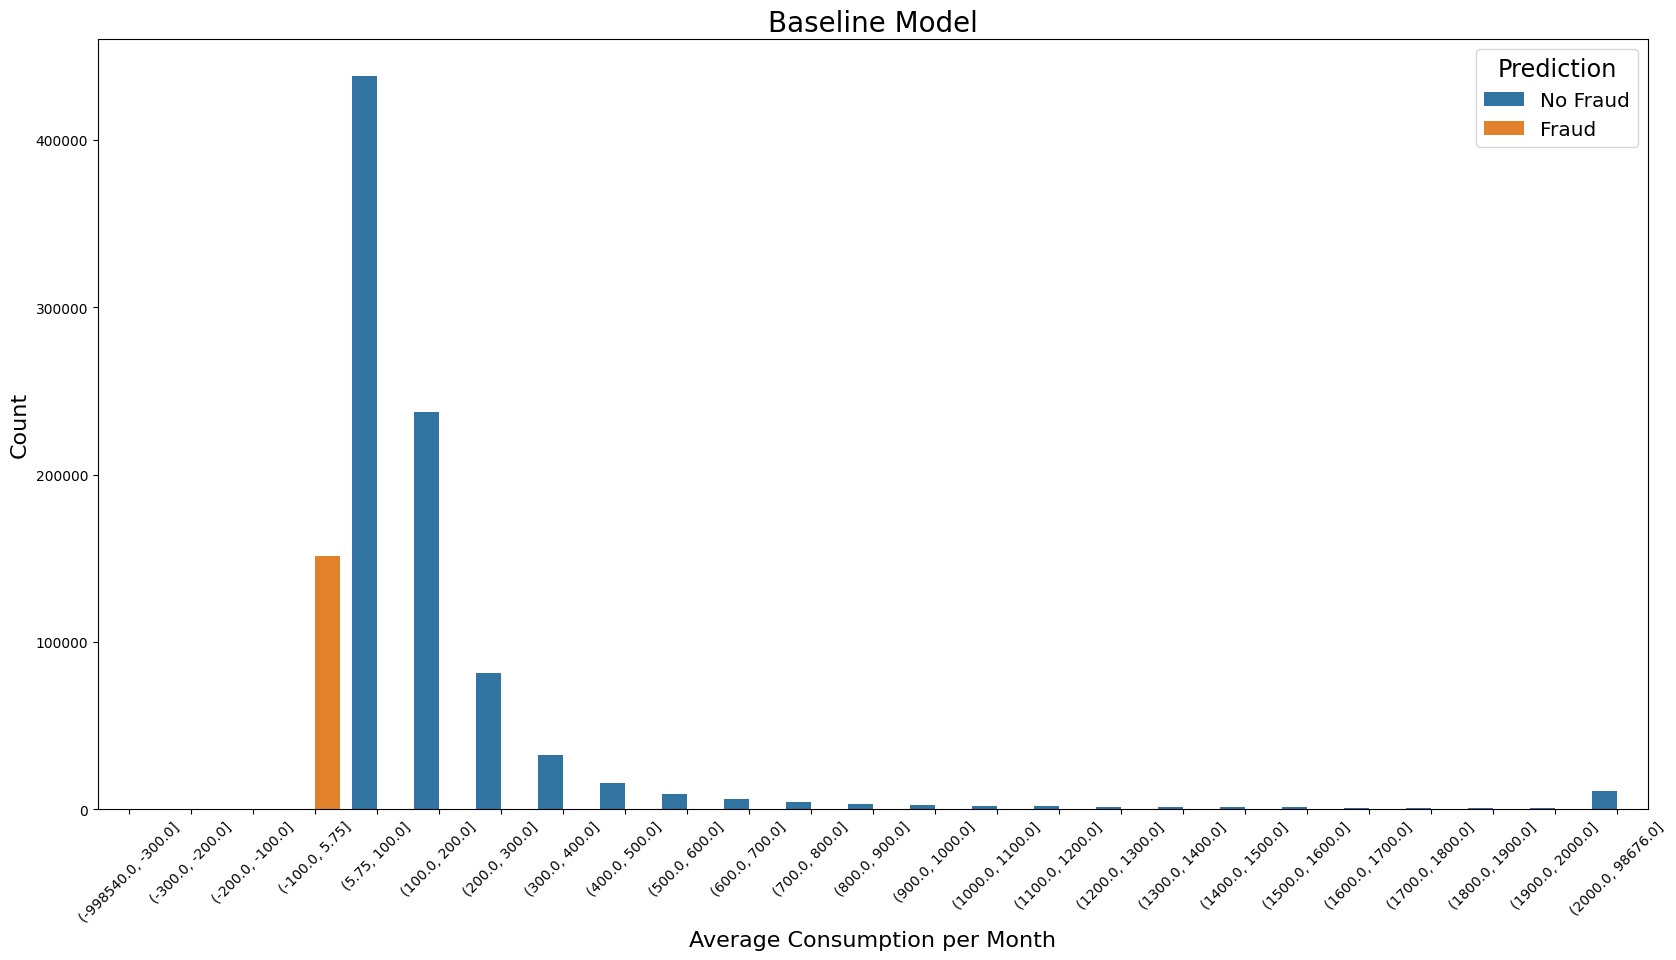

In [ ]:
fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=df_small_bins, x='index_change_month_bin', hue='pred_baseline')
#data=df_small_bins.query('index_change_month < 1800')

plt.xticks(rotation=45)
plt.legend(
    title='Prediction',
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel('Average Consumption per Month', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.title('Baseline Model', fontsize=20)
plt.show();

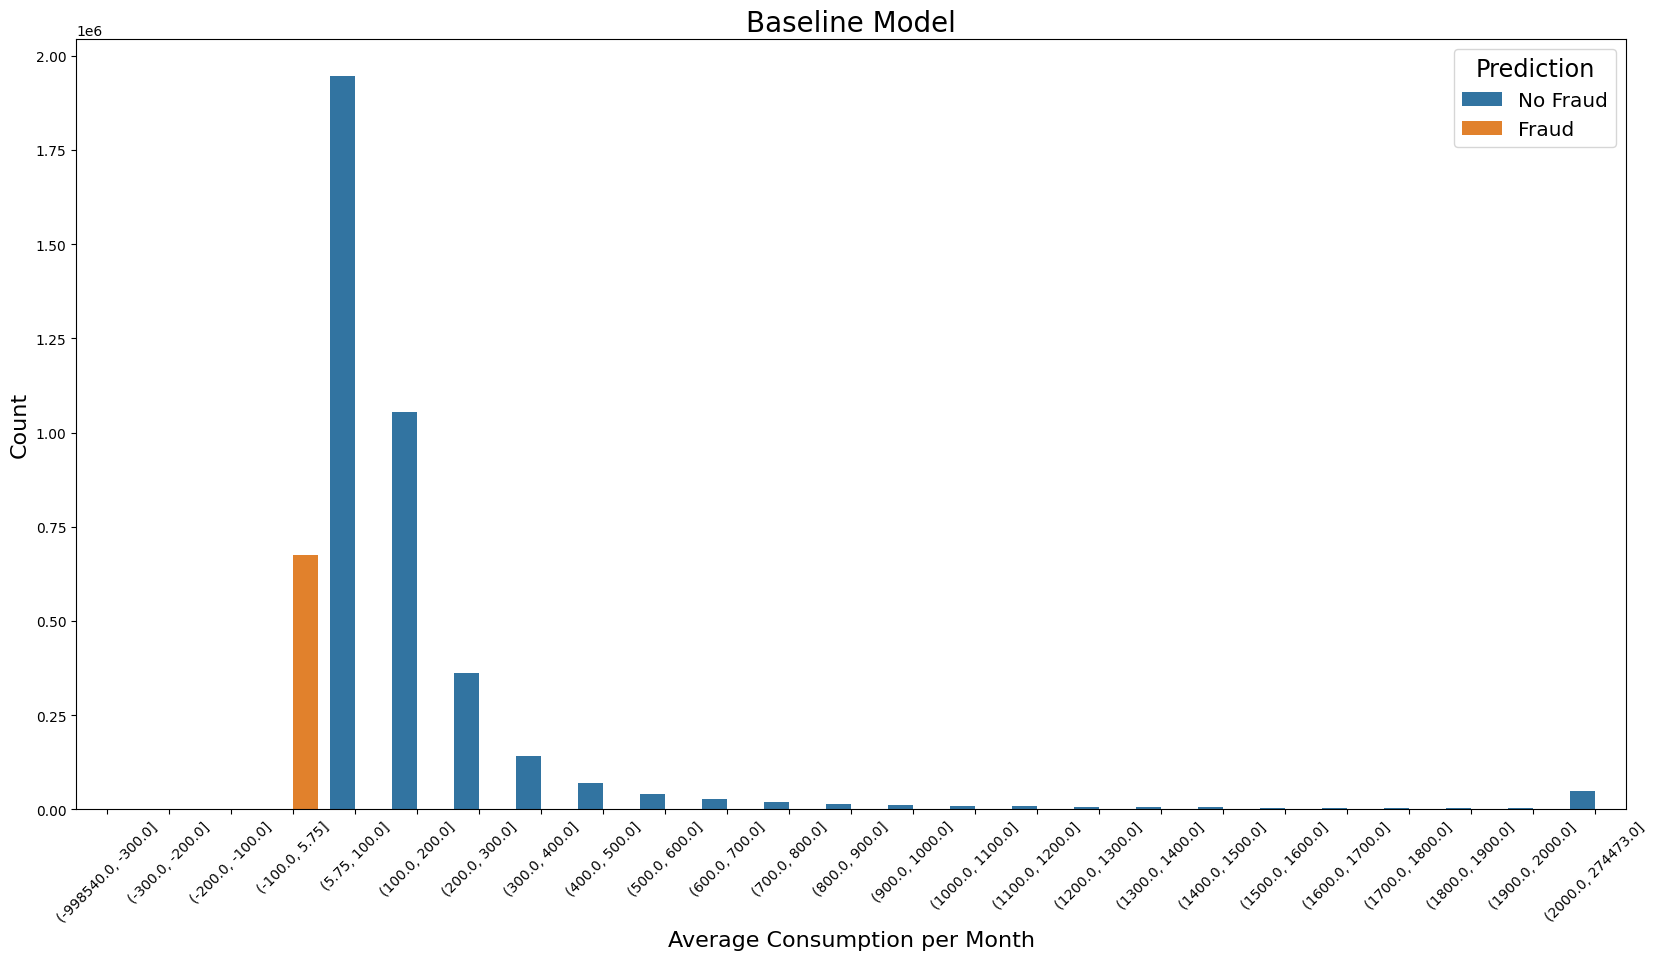

In [ ]:
fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=df_red_bins, x='index_change_month_bin', hue='pred_baseline')
#data=df_small_bins.query('index_change_month < 1800')

plt.xticks(rotation=45)
plt.legend(
    title='Prediction',
    labels = ['No Fraud','Fraud'],
    fontsize='x-large',
    title_fontsize='xx-large')
plt.xlabel('Average Consumption per Month', fontsize=16);
plt.ylabel('Count', fontsize=16);
plt.title('Baseline Model', fontsize=20)
plt.show();


## New approach with restricted x-axis, i.e. bins

In [38]:
#np.arange(-300, 1550, 50)

array([-300, -250, -200, -150, -100,  -50,    0,   50,  100,  150,  200,
        250,  300,  350,  400,  450,  500,  550,  600,  650,  700,  750,
        800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1300,
       1350, 1400, 1450, 1500])

In [70]:
bins_interval = [-300, -250, -200, -150, -100,  -50, quantile_idx,  50,  100,  150,  200,
        250,  300,  350,  400,  450,  500,  550,  600,  650,  700,  750,
        800,  850,  900,  950, 1000, 1050, 1100, 1150, 1200, 1250, 1300,
       1350, 1400, 1450, 1500] #

In [71]:
df_red_interval = df_red.query('index_change_month > -300 and index_change_month < 1500')

In [72]:
#index series for the large data set, restricted to interval
idx_ser_large_interval = pd.cut(df_red_interval["index_change_month"], bins=bins_interval)#,labels=all_bins[:-1])
idx_ser_large_interval.name = 'index_change_month_bin'

In [73]:
df_red_interval_bins =  pd.concat([df_red_interval, idx_ser_large_interval], axis=1)
df_red_interval_bins.head()

,index_change_month,pred_baseline,index_change_month_bin
0,20.500000,0,"(5.75, 50.0]"
1,346.000000,0,"(300.0, 350.0]"
2,30.750000,0,"(5.75, 50.0]"
3,25.500000,0,"(5.75, 50.0]"
4,47.666667,0,"(5.75, 50.0]"


In [75]:
# Set custom color palette
# from https://coolors.co/

colors = ['#2c1258','#b86a44'#, '#671f47', '#a22e54',  '#dabc66'
          ]
customPalette = sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

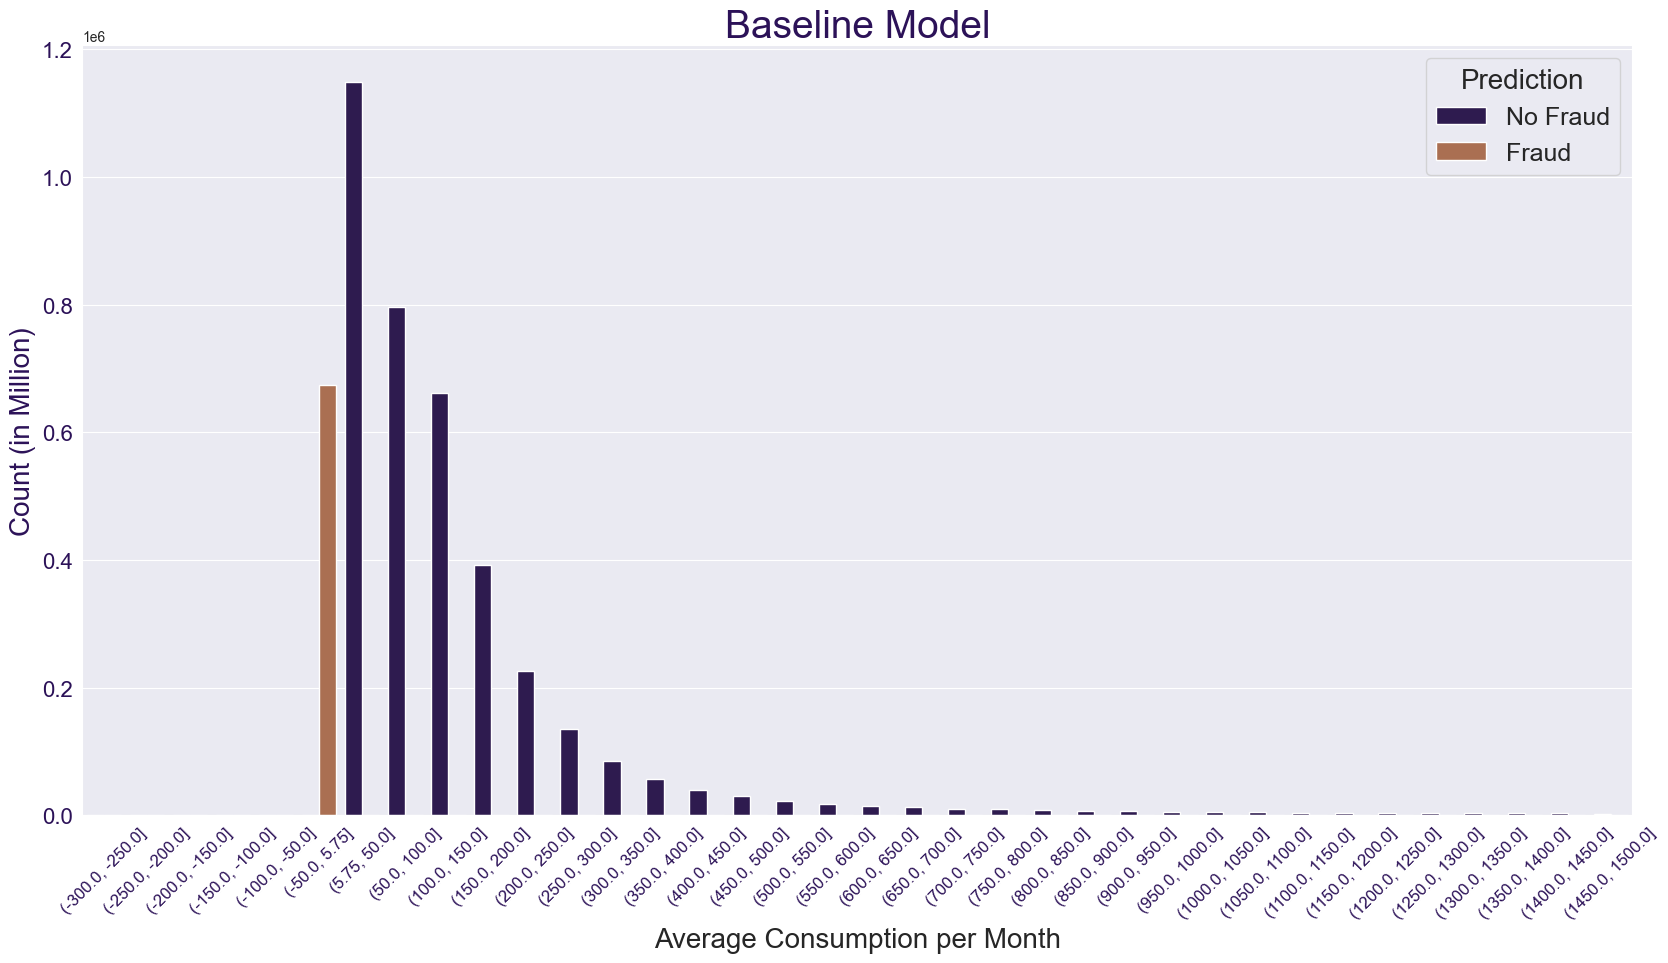

<Figure size 640x480 with 0 Axes>

In [91]:
# plot countplot of index_change_month distribution with baseline prediction hue
fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=df_red_interval_bins, x='index_change_month_bin', hue='pred_baseline', color=customPalette)

plt.xticks(rotation=45)
plt.legend(
    title='Prediction',
    labels = ['No Fraud','Fraud'],
    fontsize=18,#'x-large',
    title_fontsize=20#'xx-large'
    )
plt.xlabel('Average Consumption per Month', fontsize=20);
plt.ylabel('Count (in Million)', fontsize=20, color='#2c1258');
plt.title('Baseline Model', fontsize=28, color='#2c1258') #color='#b86a44'
plt.xticks(color='#2c1258',fontsize=12)
plt.yticks(color='#2c1258', fontsize=16)
plt.show();
#plt.savefig('plots/baseline_plot.jpg')

# plt.xlabel(' ');


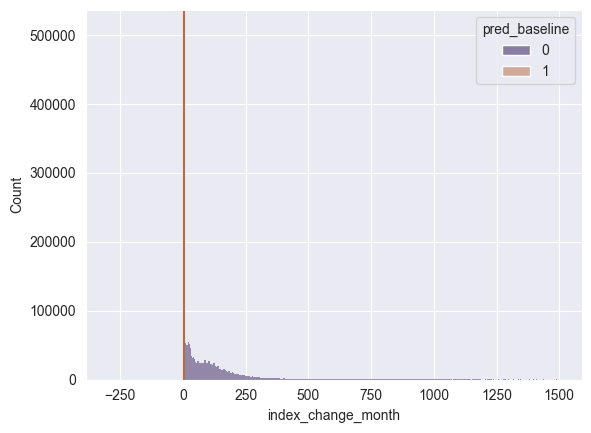

In [85]:
# # histplot, not useful
# graph = sns.histplot(data=df_red_interval, x='index_change_month', hue='pred_baseline', color=customPalette)
# graph.axvline(x=quantile_idx, color='#b86a44')
# #sns.lineplot(x=quantile_idx, y=[0,5])
# plt.show()

In [108]:
# fig = plt.figure(figsize=(20,10))
# g = sns.countplot(data=df_bins, x='index_change_month_bin', hue='pred_baseline')
# #data=df_small_bins.query('index_change_month < 1800')

# plt.xticks(rotation=45)
# plt.legend(
#     title='Prediction',
#     labels = ['No Fraud','Fraud'],
#     fontsize='x-large',
#     title_fontsize='xx-large')
# plt.xlabel('Average Consumption per Month', fontsize=16);
# plt.ylabel('Count', fontsize=16);
# plt.title('Baseline Model', fontsize=20)
# plt.show();

NameError: name 'df_bins' is not defined

<Figure size 2000x1000 with 0 Axes>

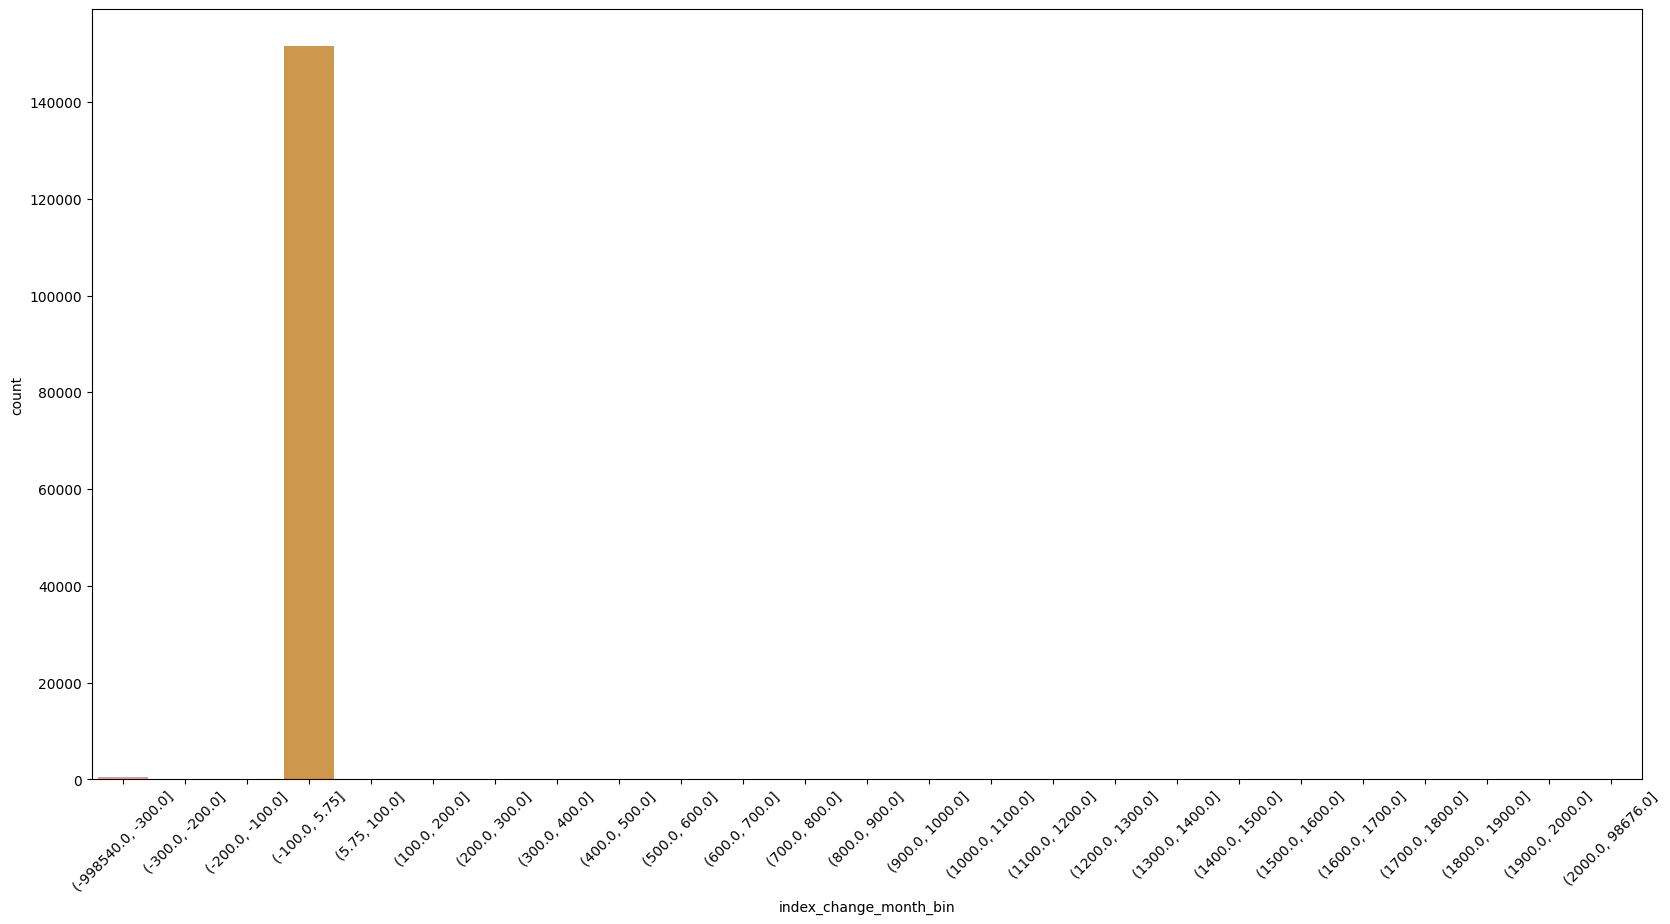

In [ ]:
fig = plt.figure(figsize=(20,10))
g = sns.countplot(data=df_small_bins_lower, x='index_change_month_bin')#, hue='pred_baseline')

plt.xticks(rotation=45);

In [ ]:
#sns.scatterplot(data=df_small_bins, x='index_change_month_bin', y='pred_baseline')

In [ ]:
# df_cleaned.query('index_change_month <= @quantile_idx')['target'].value_counts()

In [ ]:
# # Defining baseline model that predicts no one commits fraud
# def baseline_model_idx(df, quantile_idx):
#     y_pred = [1 if x <= quantile_idx else 0 for x in df['index_change_month']]
#     return y_pred